In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
base_path = '../../'
sys.path.append(base_path)

In [4]:
from src.pyvista_flow_field_dataset import PyvistaFlowFieldDataset
ds_pv = PyvistaFlowFieldDataset.load_from_huggingface("cooldata",num_samples=3)

(…)gce/cooldata/production_run1/batch_0.zip:   0%|          | 0.00/113M [00:00<?, ?B/s]

In [5]:
volume_pv = ds_pv[0].volume_data[0][0][0]
volume_pv

2025-05-19 07:37:57.547 (  34.608s) [          21EACF]      vtkCGNSReader.cxx:4268  WARN| vtkCGNSReader (0x15dc2e2d0): Skipping BC_t node: BC_t type 'BCInflow' not supported yet.
2025-05-19 07:37:57.547 (  34.609s) [          21EACF]      vtkCGNSReader.cxx:4268  WARN| vtkCGNSReader (0x15dc2e2d0): Skipping BC_t node: BC_t type 'BCSymmetryPlane' not supported yet.
2025-05-19 07:37:57.547 (  34.609s) [          21EACF]      vtkCGNSReader.cxx:4268  WARN| vtkCGNSReader (0x15dc2e2d0): Skipping BC_t node: BC_t type 'BCTunnelOutflow' not supported yet.


UnstructuredGrid (0x15d105c60)
  N Cells:    185136
  N Points:   203036
  X Bounds:   -4.337e-19, 5.000e-01
  Y Bounds:   -4.337e-19, 1.000e-01
  Z Bounds:   -1.316e-04, 2.000e-02
  N Arrays:   7

In [6]:
import numpy as np
import pyvista as pv

In [7]:
nx,ny,nz = 50,20,10
x, y, z = np.mgrid[0:0.4:complex(nx), 
                    -0.1:0.1:complex(ny), 
                    0:0.02:complex(nz)]
grid = pv.StructuredGrid(x, y, z)
interpolated_grid = grid.sample(volume_pv, pass_cell_data=True)

In [7]:
interpolated_grid

StructuredGrid (0x127a2be80)
  N Cells:      8379
  N Points:     10000
  X Bounds:     0.000e+00, 4.000e-01
  Y Bounds:     -1.000e-01, 1.000e-01
  Z Bounds:     0.000e+00, 2.000e-02
  Dimensions:   50, 20, 10
  N Arrays:     12

In [8]:
interpolated_grid['vtkValidPointMask']

pyvista_ndarray([0, 0, 0, ..., 0, 0, 0], shape=(10000,), dtype=int8)

In [9]:
interpolated_grid.cell_data

pyvista DataSetAttributes
Association     : CELL
Active Scalars  : None
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays :
    vtkGhostType            uint8      (8379,)

In [10]:
interpolated_grid.plot(scalars='Pressure')

Widget(value='<iframe src="http://localhost:58897/index.html?ui=P_0x127a9dd90_0&reconnect=auto" class="pyvista…

In [11]:
interpolated_grid.cell_data['vtkGhostType']

pyvista_ndarray([32, 32, 32, ..., 32, 32, 32], shape=(8379,), dtype=uint8)

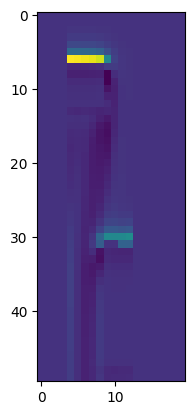

In [12]:
import matplotlib.pyplot as plt
data=interpolated_grid['Velocity'].reshape((nx,ny,nz,3), order='F')
plt.imshow(data[:,:,5,2])
plt.show()

In [13]:
volume_pv.plot(scalars='Pressure')

Widget(value='<iframe src="http://localhost:58897/index.html?ui=P_0x167fa20d0_1&reconnect=auto" class="pyvista…

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.3959184885025024..3.146939754486084].


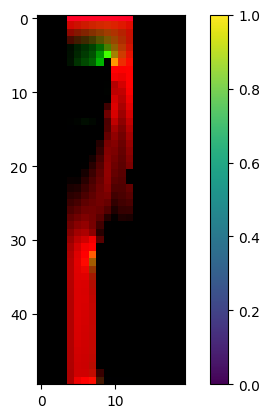

In [14]:
plt.imshow(data[:,:,0])
plt.colorbar()
plt.show()

In [15]:
data[:,:,0].min()

np.float64(-1.3959184885025024)

In [16]:
# check for nans
np.isnan(data).sum()

np.int64(0)

In [17]:
interpolated_grid['Pressure'][:nx]

pyvista_ndarray([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0.])

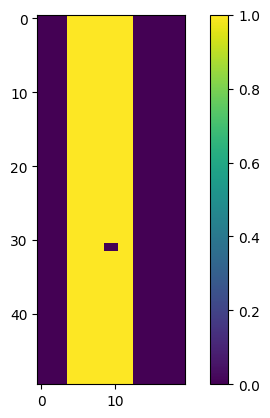

In [18]:

mask=interpolated_grid['vtkValidPointMask'].reshape(nx,ny,nz, order='F')
plt.imshow(mask[:,:,5])
plt.colorbar()
plt.show()

In [19]:
ds_pv.get_bounds()

2025-03-26 07:38:05.224 (  24.928s) [          4B4B68]      vtkCGNSReader.cxx:4268  WARN| vtkCGNSReader (0x1126fc0f0): Skipping BC_t node: BC_t type 'BCInflow' not supported yet.
2025-03-26 07:38:05.224 (  24.928s) [          4B4B68]      vtkCGNSReader.cxx:4268  WARN| vtkCGNSReader (0x1126fc0f0): Skipping BC_t node: BC_t type 'BCSymmetryPlane' not supported yet.
2025-03-26 07:38:05.224 (  24.928s) [          4B4B68]      vtkCGNSReader.cxx:4268  WARN| vtkCGNSReader (0x1126fc0f0): Skipping BC_t node: BC_t type 'BCTunnelOutflow' not supported yet.
2025-03-26 07:38:05.541 (  25.245s) [          4B4B68]      vtkCGNSReader.cxx:4268  WARN| vtkCGNSReader (0x1278a12a0): Skipping BC_t node: BC_t type 'BCInflow' not supported yet.
2025-03-26 07:38:05.541 (  25.245s) [          4B4B68]      vtkCGNSReader.cxx:4268  WARN| vtkCGNSReader (0x1278a12a0): Skipping BC_t node: BC_t type 'BCSymmetryPlane' not supported yet.
2025-03-26 07:38:05.542 (  25.246s) [          4B4B68]      vtkCGNSReader.cxx:4268  

(0.0,
 0.40000000000000013,
 -0.06557989546912942,
 0.034420104530870646,
 0.0,
 0.020000000000000007)

In [8]:
from src.voxel_flow_field_dataset import VoxelFlowFieldDataset, VoxelFlowFieldDatasetConfig
#ds_voxel = VoxelFlowFieldDataset('datasets/voxels',VoxelFlowFieldDatasetConfig(ds_pv))
ds_voxel = VoxelFlowFieldDataset('datasets/voxels')

In [9]:
ds_voxel.normalize()
ds_voxel[2].Y.std(dim=(0,1,2))

tensor([1.4160, 1.0842, 1.1579, 1.4145, 0.9652])

In [15]:
ds_voxel.unnormalize()
ds_voxel[1].get_field('Velocity').mean(dim=(0,1,2))

tensor([ 1.3220e+00, -1.8618e-02,  1.1447e-03])

In [17]:
ds_voxel[0].data

TensorDict(
    fields={
        Mask: MemoryMappedTensor(shape=torch.Size([32, 32, 32]), device=cpu, dtype=torch.bool, is_shared=True),
        Position: MemoryMappedTensor(shape=torch.Size([32, 32, 32, 3]), device=cpu, dtype=torch.float32, is_shared=True),
        Pressure: MemoryMappedTensor(shape=torch.Size([32, 32, 32]), device=cpu, dtype=torch.float32, is_shared=True),
        Temperature: MemoryMappedTensor(shape=torch.Size([32, 32, 32]), device=cpu, dtype=torch.float32, is_shared=True),
        Velocity: MemoryMappedTensor(shape=torch.Size([32, 32, 32, 3]), device=cpu, dtype=torch.float32, is_shared=True)},
    batch_size=torch.Size([]),
    device=cpu,
    is_shared=False)

In [11]:
gpv=ds_voxel[0].to_pyvista()
gpv

StructuredGrid (0x31c60ef20)
  N Cells:      29791
  N Points:     32768
  X Bounds:     0.000e+00, 4.000e-01
  Y Bounds:     -6.558e-02, 3.442e-02
  Z Bounds:     0.000e+00, 2.000e-02
  Dimensions:   32, 32, 32
  N Arrays:     6

In [14]:
gpv.plot(scalars='Velocity')

Widget(value='<iframe src="http://localhost:56196/index.html?ui=P_0x320653ed0_2&reconnect=auto" class="pyvista…

In [ ]:
gpv['vtkValidPointMask']

pyvista_ndarray([0, 0, 0, ..., 0, 0, 0], shape=(10000,), dtype=int8)

In [ ]:
(~ interpolated_grid['vtkValidPointMask'] == gpv['vtkValidPointMask']).sum()

np.int64(0)

In [ ]:
np.unique(interpolated_grid.cell_data['vtkGhostType'] )

pyvista_ndarray([ 0, 32], dtype=uint8)

In [ ]:
np.unique(gpv.cell_data['vtkGhostType'])

pyvista_ndarray([ 0, 32], dtype=uint8)

In [ ]:
interpolated_grid.cell_data['vtkGhostType']

pyvista_ndarray([32, 32, 32, ..., 32, 32, 32], shape=(8379,), dtype=uint8)

In [ ]:
gpv.cell_data['vtkGhostType']

pyvista_ndarray([ 0,  0,  0, ..., 32, 32, 32], shape=(8379,), dtype=uint8)

In [ ]:
(interpolated_grid.cell_data['vtkGhostType'] != gpv.cell_data['vtkGhostType']).sum()

np.int64(4260)

pyvista_ndarray([254, 254, 254, ..., 255, 255, 255],
                shape=(8379,), dtype=uint8)